# class project-CFPB Consumer Complaints

In [5]:
#import library
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
from tqdm import tqdm
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
%matplotlib inline
#import chart-studio.tools as tls
#import chart-studio as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [111]:
# import data and build up dataframe
data = pd.read_csv('complaints_25Nov21.csv')

# EDA

In [7]:
#how many data we have
data.shape

(207260, 18)

In [23]:
#get to know the columns
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID',
       'complain_length'],
      dtype='object')

In [6]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2016-10-26,Money transfers,International money transfer,Other transaction issues,NaN,"To whom it concerns, I would like to file a fo...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NaN,NaN,NaN,Consent provided,Web,2016-10-29,Closed with explanation,Yes,No,2180490
1,2015-03-27,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,My name is XXXX XXXX XXXX and huband name is X...,Company chooses not to provide a public response,"CITIBANK, N.A.",PA,151XX,Older American,Consent provided,Web,2015-03-27,Closed with explanation,Yes,No,1305453
2,2015-04-20,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,XXXX 2015 : I called to make a payment on XXXX...,Company chooses not to provide a public response,U.S. BANCORP,PA,152XX,NaN,Consent provided,Web,2015-04-22,Closed with monetary relief,Yes,No,1337613
3,2013-04-29,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,JPMORGAN CHASE & CO.,VA,22406,Servicemember,NaN,Phone,2013-04-30,Closed with explanation,Yes,Yes,393900
4,2013-05-29,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",GA,30044,NaN,NaN,Referral,2013-05-31,Closed with explanation,Yes,No,418647


In [8]:
# Explore the data type and Null values
print(data.shape)
data.info()

(207260, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207260 entries, 0 to 207259
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 207260 non-null  object
 1   Product                       207260 non-null  object
 2   Sub-product                   164245 non-null  object
 3   Issue                         207260 non-null  object
 4   Sub-issue                     10347 non-null   object
 5   Consumer complaint narrative  29391 non-null   object
 6   Company public response       58458 non-null   object
 7   Company                       207260 non-null  object
 8   State                         205066 non-null  object
 9   ZIP code                      197974 non-null  object
 10  Tags                          28265 non-null   object
 11  Consumer consent provided?    51313 non-null   object
 12  Submitted via                 207260 non-null

let's get some insights about the complaints.

first, explore based on states.

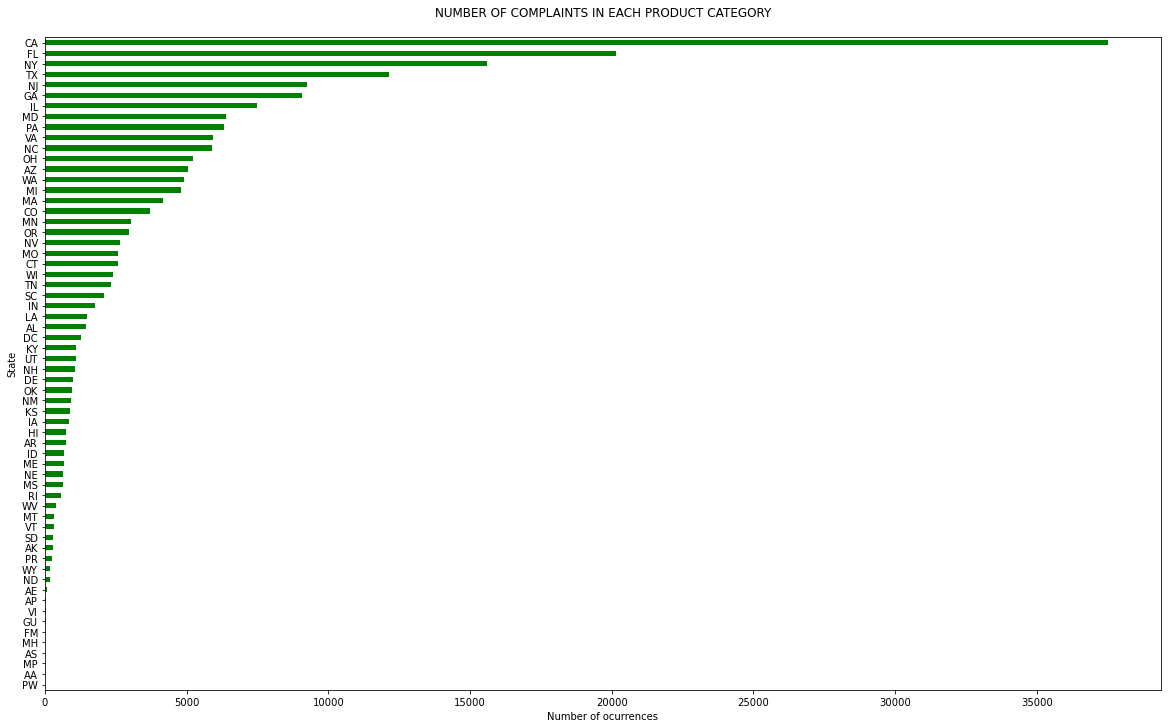

In [10]:
fig = plt.figure(figsize=(20,12))
data.groupby(['State'])['Complaint ID'].count().sort_values().plot.barh(
    ylim=0, color='green', title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);


California has most complaints in all states and let's see what the complaints are.

In [74]:
data[data['State'] == 'CA']['Product'].value_counts()

Mortgage                   19260
Bank account or service     8980
Credit card                 6418
Debt collection             1275
Consumer Loan                761
Student loan                 308
Money transfers              177
Prepaid card                 163
Credit reporting             116
Other financial service       34
Payday loan                   13
Name: Product, dtype: int64

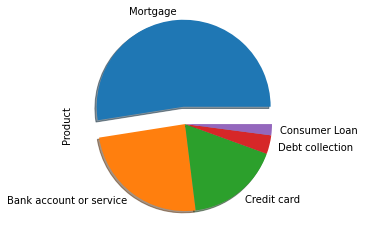

In [76]:
data[data['State'] == 'CA']['Product'].value_counts().head(5).plot.pie(explode=[0.2,0,0,0,0],shadow=True)
# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

California mainly has most complaints around Mortgage. 

In [77]:
data[data['State'] == 'CA']['Issue'].value_counts().head(10)

Loan modification,collection,foreclosure    12228
Loan servicing, payments, escrow account     4109
Account opening, closing, or management      4069
Deposits and withdrawals                     2419
Application, originator, mortgage broker     1525
Problems caused by my funds being low        1092
Billing disputes                             1015
Other                                        1008
Making/receiving payments, sending money      728
Using a debit or ATM card                     672
Name: Issue, dtype: int64

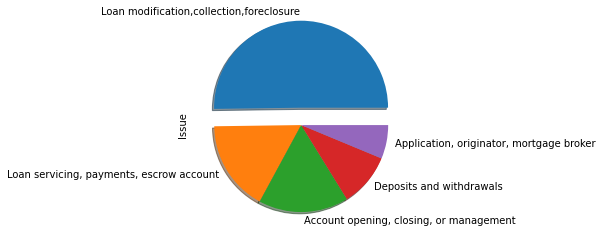

In [78]:
data[data['State'] == 'CA']['Issue'].value_counts().head(5).plot.pie(explode=[0.2,0,0,0,0],shadow=True)
# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

the main issue is Loan modification,collection,foreclosure.

In [80]:
p_product_discussions = round(data["Product"].value_counts() / len(data["Product"]) * 100,2)

print(p_product_discussions)

labels = list(p_product_discussions.index)
values = p_product_discussions.values.tolist()
colors = ['#F78181', '#F5A9BC', '#2E9AFE', '#58FA58', '#FAAC58', '#088A85', '#8A0808', '#848484', '#F781F3', '#D7DF01', '#2E2EFE']


product_pie = go.Pie(labels=labels, values=values, 
                          marker=dict(colors=colors,
                         line=dict(color='#000000', width=2)))

layout = go.Layout(title='Product Types')

fig = go.Figure(data=[product_pie], layout=layout)
iplot(fig)

Mortgage                   49.06
Bank account or service    21.52
Credit card                20.36
Debt collection             3.79
Consumer Loan               2.66
Student loan                1.38
Money transfers             0.42
Credit reporting            0.36
Prepaid card                0.31
Other financial service     0.11
Payday loan                 0.04
Name: Product, dtype: float64


mortgage is the most common product. 

**let's look at the disputes

In [11]:
data['Consumer disputed?'].value_counts()

No     162357
Yes     44903
Name: Consumer disputed?, dtype: int64

In [25]:
data['Consumer disputed?'].value_counts(normalize=True)

No     0.783349
Yes    0.216651
Name: Consumer disputed?, dtype: float64

In [26]:
# Check for NaNs in the 'Consumer Disputed' column

data['Consumer disputed?'].isna().sum()

0

In [81]:
disputed = data['Consumer disputed?'].value_counts()
company_response = data['Company response to consumer'].value_counts()
top5_disputed = data['Company'].loc[data['Consumer disputed?'] == 'Yes'].value_counts()[:5]
top5_nodispute = data['Company'].loc[data['Consumer disputed?'] == 'No'].value_counts()[:5]

In [88]:
# Top three subplots
import plotly.tools as tls
total_complaints_plotly = go.Bar(
            x=disputed.index.values,
            y=disputed.values,
    text = 'Complaints',
    showlegend=False,
    marker=dict(
        color=['Red', 'Green'])
    )
top5_disputes_plotly = go.Bar(
            x=top5_disputed.index.values,
            y=top5_disputed.values,
    text='Disputes',
    showlegend=False,
    marker=dict(
        color=top5_disputed.values,
        colorscale='Reds')
    )

top5_nodisputes_plotly = go.Bar(
            x=top5_nodispute.index.values,
            y=top5_nodispute.values,
    text='No Disputes',
    showlegend=False,
    marker=dict(
        color=top5_nodispute.values,
        colorscale='Greens')
    )
# Lower Subplot
customer_res_plotly = go.Bar(
            x=company_response.index.values,
            y=company_response.values,
    text='Customer Response',
    showlegend=False,
        marker=dict(
        color=data['Company response to consumer'].value_counts().values,
        colorscale = [[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'], 
                      [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], 
                      [0.5555555555555556, 'rgb(224,243,248)'], [0.6666666666666666, 'rgb(171,217,233)'], 
                      [0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'], 
                      [1.0, 'rgb(49,54,149)']],
        reversescale = True
        )
)
fig = tls.make_subplots(rows=2, cols=3, specs=[[{}, {}, {}], [{'colspan': 3}, None, None]],
                          subplot_titles=('Did the Customer Disputed?',
                                          'Disputes',
                                         'No Disputes',
                                         'Company response to consumer'))

# First three Subplots
fig.append_trace(total_complaints_plotly, 1, 1)
fig.append_trace(top5_disputes_plotly , 1, 2)
fig.append_trace(top5_nodisputes_plotly , 1, 3)

# Lower Subplot
fig.append_trace(customer_res_plotly, 2, 1)



fig['layout'].update(showlegend=True, height=1000, width=800, title='Sectors')
iplot(fig, filename='Complaints')


In [115]:
data['Date received'] = pd.to_datetime(data['Date received'])
data['year_received'], data['month_received'] = data['Date received'].dt.year, data['Date received'].dt.month
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,year_received,month_received
0,2016-10-26,Money transfers,International money transfer,Other transaction issues,NaN,"To whom it concerns, I would like to file a fo...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NaN,NaN,NaN,Consent provided,Web,2016-10-29,Closed with explanation,Yes,No,2180490,2016,10
1,2015-03-27,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,My name is XXXX XXXX XXXX and huband name is X...,Company chooses not to provide a public response,"CITIBANK, N.A.",PA,151XX,Older American,Consent provided,Web,2015-03-27,Closed with explanation,Yes,No,1305453,2015,3
2,2015-04-20,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,XXXX 2015 : I called to make a payment on XXXX...,Company chooses not to provide a public response,U.S. BANCORP,PA,152XX,NaN,Consent provided,Web,2015-04-22,Closed with monetary relief,Yes,No,1337613,2015,4
3,2013-04-29,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,JPMORGAN CHASE & CO.,VA,22406,Servicemember,NaN,Phone,2013-04-30,Closed with explanation,Yes,Yes,393900,2013,4
4,2013-05-29,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",GA,30044,NaN,NaN,Referral,2013-05-31,Closed with explanation,Yes,No,418647,2013,5


In [92]:
# Create a Line Plot by the top 5 companies  by year who had more customer interaction cases (Disputes and No Disputes)
sorting_groups = data.groupby(['year_received', 'Consumer disputed?'])['Company'].apply(lambda x: x.value_counts())
d = {'CRM': sorting_groups}


year_crm = pd.DataFrame(data=d).reset_index()
year_crm.sort_values(by='CRM', ascending=False)

crm_df = year_crm.rename(columns={"level_2": "Company"})

# Conditionals Top 5 Companies with dispues (Bank of America, Wells Fargo, JP Morgan, Equifax, CitiBank)
boa_disputes = crm_df.loc[(crm_df['Company'] == 'Bank of America') & (crm_df['Consumer disputed?'] == 'Yes')]
wfc_disputes = crm_df.loc[(crm_df['Company'] == 'Wells Fargo & Company') & (crm_df['Consumer disputed?'] == 'Yes')]
jp_disputes = crm_df.loc[(crm_df['Company'] == 'JPMorgan Chase & Co.') & (crm_df['Consumer disputed?'] == 'Yes')]
equi_disputes = crm_df.loc[(crm_df['Company'] == 'Equifax') & (crm_df['Consumer disputed?'] == 'Yes')]
citi_disputes = crm_df.loc[(crm_df['Company'] == 'Citibank') & (crm_df['Consumer disputed?'] == 'Yes')]

# Establish the year (Continue Here tomorrow!)
years = boa_disputes['year_received'].values.tolist()

In [93]:
crm_df.head()

,year_received,Consumer disputed?,Company,CRM
0,2011,No,"BANK OF AMERICA, NATIONAL ASSOCIATION",431
1,2011,No,JPMORGAN CHASE & CO.,298
2,2011,No,"CITIBANK, N.A.",255
3,2011,No,WELLS FARGO & COMPANY,170
4,2011,No,U.S. BANCORP,53


In [100]:
# Implementing line chart (top 5 companies with complaints)
boa_disputes_amount = boa_disputes['CRM'].values.tolist()
wfc_disputes_amount = wfc_disputes['CRM'].values.tolist()
jp_disputes_amount = jp_disputes['CRM'].values.tolist()
equi_disputes_amount = equi_disputes['CRM'].values.tolist()
citi_disputes_amount = citi_disputes['CRM'].values.tolist()

# Text to add
boa_text = [str(dis) + '\n Disputes'  for dis in boa_disputes_amount]
wfc_text = [str(wfc) + '\n Disputes'  for wfc in wfc_disputes_amount]
jp_text = [str(jp) + '\n Disputes' for jp in jp_disputes_amount]
equi_text = [str(equi) + '\n Disputes' for equi in equi_disputes_amount]
citi_text = [str(citi) + '\n Disputes' for citi in citi_disputes_amount]

boa_disputes_chart = go.Scatter(
    x=years,
    y=boa_disputes_amount,
    text=boa_text,
    name='Bank of America', 
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(0, 22, 235)',
             ),
    fill='tonexty'
)

wfc_disputes_chart = go.Scatter(
    x=years,
    y=wfc_disputes_amount,
    text=wfc_text,
    name="Wells Fargo & Company", 
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(275, 170, 0)',
             ),
    fill='tonexty'
)

jp_disputes_chart = go.Scatter(
    x=years,
    y=jp_disputes_amount,
    text=jp_text,
    name='JP Morgan Chase & Co.',
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(128, 128, 128)',
             ),
    fill='tonexty'
)

equi_disputes_chart = go.Scatter(
    x=years,
    y=equi_disputes_amount,
    text=equi_text,
    name='Equifax',
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(175, 0, 0)',
             ),
    fill='tonexty'
)

citi_disputes_chart = go.Scatter(
    x=years,
    y=citi_disputes_amount,
    text=citi_text,
    name='CitiBank',
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(0, 215, 215)',
             ),
    fill='tonexty'
)

data = [boa_disputes_chart, wfc_disputes_chart, jp_disputes_chart, equi_disputes_chart, citi_disputes_chart]

layout = dict(title = 'Number of Disputes <br> (Top 5 Companies)',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Number of Disputes')
             )
fig = dict(data=data, layout=layout)


iplot(fig, filename='basic-area-no-bound')

In [121]:
# Months with the highest disputes (We will make a barplot)
def customerservice_per_month(month, dispute):
    result = data.loc[(data['month_received'] == month) & (data['Consumer disputed?'] == dispute)]
    return result

# Monthly Disputes
dis_january = len(customerservice_per_month(month=1, dispute='Yes'))
dis_february = len(customerservice_per_month(month=2, dispute='Yes'))
dis_march = len(customerservice_per_month(month=3, dispute='Yes'))
dis_april = len(customerservice_per_month(month=4, dispute='Yes'))
dis_may = len(customerservice_per_month(month=5, dispute='Yes'))
dis_june = len(customerservice_per_month(month=6, dispute='Yes'))
dis_july = len(customerservice_per_month(month=7, dispute='Yes'))
dis_august = len(customerservice_per_month(month=8, dispute='Yes'))
dis_september = len(customerservice_per_month(month=9, dispute='Yes'))
dis_october = len(customerservice_per_month(month=10, dispute='Yes'))
dis_november = len(customerservice_per_month(month=11, dispute='Yes'))
dis_december = len(customerservice_per_month(month=12, dispute='Yes'))
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
         'October', 'November', 'December']
disputes_by_month = [dis_january, dis_february, dis_march, dis_april, dis_may, dis_june, dis_july, dis_august, dis_september,
                    dis_october, dis_november, dis_december]
disputes_chart = go.Bar(
    y=months,
    x=disputes_by_month,
    orientation='h',
    name='Disputes',
    text='Disputes',
    marker=dict(
        color='#FF6464',
    line=dict(
        color='#CD3232',
        width=1.5
    ))
)

fig = tls.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('Dispute Chart per Month',
                                          'No Dispute Chart per Month'))

fig.append_trace(disputes_chart, 1, 1)


fig['layout'].update(showlegend=True, title="Level of Activity by Month")
iplot(fig)

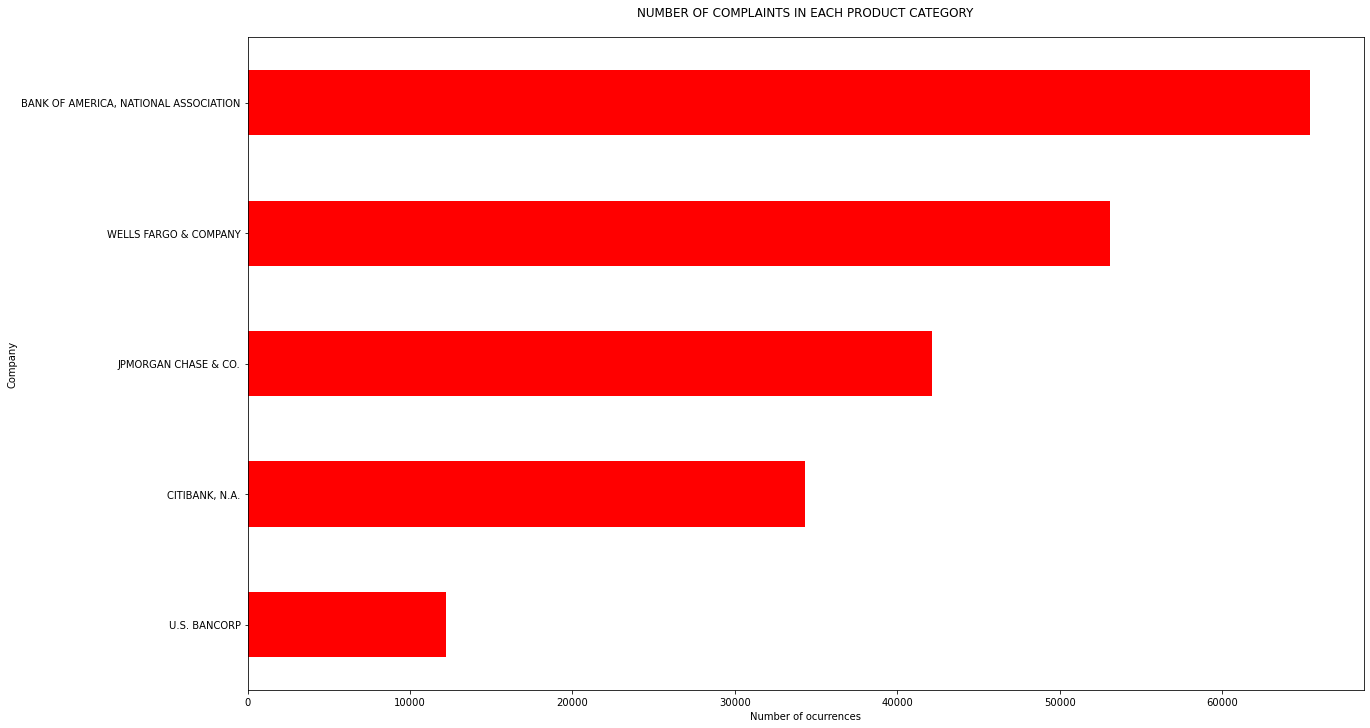

In [113]:
fig = plt.figure(figsize=(20,12))
data.groupby(['Company'])['Complaint ID'].count().sort_values().plot.barh(
    ylim=0, color='red', title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);


In [129]:
#data[data['Company'] == 'Bank of America']['Product'].value_counts()
data[data['Company'] == 'BANK OF AMERICA, NATIONAL ASSOCIATION']['Product'].value_counts().head(10)

Mortgage                   39818
Bank account or service    13702
Credit card                 9003
Debt collection             1631
Consumer Loan                672
Money transfers              263
Credit reporting             114
Student loan                 100
Other financial service       69
Prepaid card                  54
Name: Product, dtype: int64

In [29]:
#data['Consumer disputed?'] = data['Consumer disputed?'].astype('category')

**Function to explore how much catagorical feature is affecting the target**

In [12]:
def target_mean(data,feature,target,decimal=2):
    sns.countplot(data=data, y=feature, order = data[feature].value_counts().head(10).index,)
    return(data.groupby(feature).agg({target: "mean"}).sort_values(by=[target],ascending=[False]).round(decimal))

Use the function to explore any catagorical columns

TypeError: Could not convert NoNoYesNoNoYesNoNoYesNoYesNoYesYesYesNoNoNoNoYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesYesNoNoNoNoYesNoYesNoNoYesNoNoYesNoNoYesYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoYesNoNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoYesNoNoYesNoYesNoYesNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesYesYesNoYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesYesNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoYesYesNoYesNoNoYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoYesNoNoYesNoNoYesYesNoNoNoYesYesNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoYesYesNoYesNoNoNoNoNoYesNoYesNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesYesYesNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoYesNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoYesNoNoNoYesNoNoNoNoYesYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesNoYesYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoYesNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoYesYesNoYesNoNoNoNoNoNoNoYesNoNoYesNoYesYesNoNoNoNoNoNoNoYesYesNoNoNoYesYesNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoYesNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoYesYesNoYesNoNoNoNoNoNoNoYesYesYesNoYesYesNoYesNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoYesYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoYesNoNoNoNoNoYesYesNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesYesNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoYesYesYesNoNoYesNoYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoYesNoYesNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesYesNoNoYesNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoYesYesNoNoYesNoNoNoNoYesNoYesYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoYesNoNoYesYesYesNoNoNoNoNoNoNoYesNoYesNoYesYesNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoYesYesNoYesNoNoYesNoYesNoYesNoNoNoYesNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoNoNoNoYesYesYesYesYesYesYesNoNoNoNoYesYesYesNoYesYesYesNoNoYesYesYesYesNoNoYesYesYesYesYesYesNoNoNoNoNoYesNoNoNoYesNoYesYesNoYesNoYesYesNoYesYesNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoYesNoNoYesYesYesNoNoNoNoYesNoNoYesNoNoYesNoYesNoNoYesNoYesYesYesNoYesNoYesNoNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesYesNoNoNoNoYesYesYesYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoNoNoNoYesNoYesYesNoNoNoYesYesYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNo to numeric

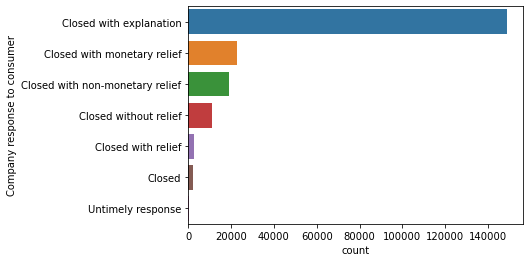

In [33]:
target_mean(data,'Company response to consumer','Consumer disputed?')

In [14]:
data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna('Un'))

In [15]:
for col in data.select_dtypes(['object']).columns:
    print(col,':',data[col].nunique(),':',data[col].isna().sum())


Date received : 1947 : 0
Product : 11 : 0
Sub-product : 48 : 0
Issue : 93 : 0
Sub-issue : 58 : 0
Consumer complaint narrative : 29346 : 0
Company public response : 9 : 0
Company : 5 : 0
State : 63 : 0
ZIP code : 12613 : 0
Tags : 4 : 0
Consumer consent provided? : 5 : 0
Submitted via : 6 : 0
Date sent to company : 1898 : 0
Company response to consumer : 7 : 0
Timely response? : 2 : 0
Consumer disputed? : 2 : 0


In [16]:
# Complain Length in terms of words
data['complain_length'] = data['Consumer complaint narrative'].str.count(' ') + 1

In [17]:
y_train = data['Consumer disputed?']
x_train = data.drop('Consumer disputed?',axis=1)
x_train.shape, y_train.shape

((207260, 18), (207260,))

In [18]:
from sklearn.model_selection import train_test_split
x_train1, x_train2 , y_train1, y_train2 =  train_test_split(x_train , y_train, test_size=0.25, random_state=42)


In [20]:
from catboost import CatBoostClassifier, Pool
categorical_features =  np.where(x_train.dtypes == object )[0]

model = CatBoostClassifier(iterations=50)
model.fit(x_train1, y_train1, cat_features=categorical_features,logging_level='Silent')
test_pred = model.predict_proba(x_train2)

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[-20:]


In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train2,test_pred[:,1])

0.6280608345880855

Text(0.5, 1.0, 'Feature Importances')

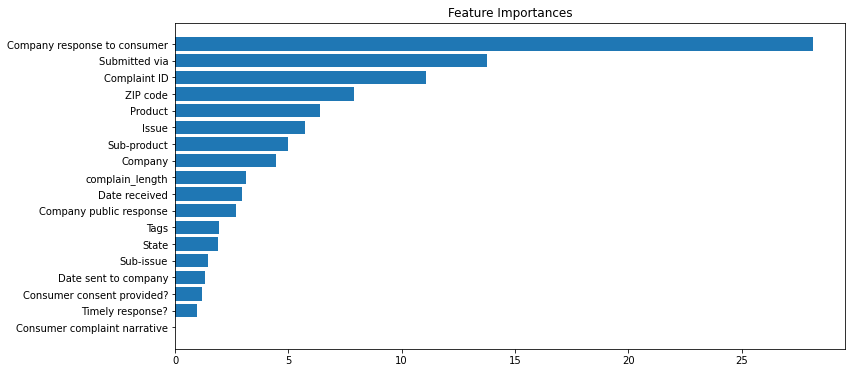

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_train2.columns)[sorted_idx])
plt.title('Feature Importances')

In [35]:
X = data[[ 'Product', 'Sub-product', 'Issue', 'Sub-issue',
        'Company public response', 'Company',
       'State',  'Tags',
       'Submitted via',  'Company response to consumer',
       'Timely response?']]

In [36]:
# Let us check if we have any missing values in our reduced dataset X

print(len(X)) # Number of rows before dropna()
print(len(X.dropna())) # Number of rows after dropna() 

207260
581


In [37]:
# Check how many values are missing in each column

X.isna().sum()

Product                              0
Sub-product                      43015
Issue                                0
Sub-issue                       196913
Company public response         148802
Company                              0
State                             2194
Tags                            178995
Submitted via                        0
Company response to consumer         0
Timely response?                     0
dtype: int64

**dealing with missing values

In [38]:
X['Sub-product'].unique()

array(['International money transfer', 'Other bank product/service',
       'Conventional fixed mortgage', 'Other mortgage',
       'Checking account', 'Vehicle lease', nan, 'Medical',
       'Conventional adjustable mortgage (ARM)', 'Vehicle loan',
       'Reverse mortgage', '(CD) Certificate of deposit', 'FHA mortgage',
       'Government benefit payment card', 'VA mortgage',
       'Savings account', 'Credit card',
       'Home equity loan or line of credit', 'Second mortgage',
       'Non-federal student loan', 'Installment loan',
       'Other special purpose card', 'Mortgage', 'I do not know',
       'Cashing a check without an account', 'Federal student loan',
       'Auto', 'Other (i.e. phone, health club, etc.)',
       'Personal line of credit', 'Domestic (US) money transfer',
       'General purpose card', 'Payday loan',
       'Traveler’s/Cashier’s checks', 'Refund anticipation check',
       'Federal student loan servicing', 'Debt settlement',
       'Gift or merchant card

In [39]:
X['Sub-issue'].unique()

array([nan, 'Debt is not mine', 'Not given enough info to verify debt',
       'Frequent or repeated calls', 'Account status',
       'Trouble with how payments are handled',
       'Talked to a third party about my debt', 'Debt was paid',
       'Attempted to/Collected exempt funds',
       'Right to dispute notice not received',
       'Debt was discharged in bankruptcy',
       'Seized/Attempted to seize property', 'Account terms',
       'Indicated committed crime not paying',
       'Having problems with customer service',
       'Threatened to sue on too old debt',
       'Contacted employer after asked not to',
       "Can't decrease my monthly payments",
       'Attempted to collect wrong amount',
       "Don't agree with fees charged",
       'Qualify for a better loan than offered',
       "Indicated shouldn't respond to lawsuit",
       'Received bad information about my loan',
       'Not disclosed as an attempt to collect',
       "Can't temporarily postpone payments",
   

In [40]:
X['State'].unique()

array([nan, 'PA', 'VA', 'GA', 'CA', 'MD', 'MN', 'WA', 'OK', 'TX', 'FL',
       'NJ', 'MA', 'WI', 'AZ', 'NY', 'DE', 'IL', 'CT', 'AE', 'MI', 'TN',
       'NH', 'MO', 'DC', 'OH', 'WV', 'NC', 'NM', 'AL', 'NV', 'UT', 'SC',
       'AK', 'KY', 'HI', 'OR', 'KS', 'CO', 'IN', 'ID', 'NE', 'VT', 'LA',
       'RI', 'WY', 'MS', 'ME', 'MT', 'IA', 'AR', 'PR', 'ND', 'SD', 'AS',
       'AP', 'GU', 'VI', 'MH', 'FM', 'AA', 'MP', 'PW'], dtype=object)

In [41]:
X['Company public response'].unique()

array(['Company has responded to the consumer and the CFPB and chooses not to provide a public response',
       'Company chooses not to provide a public response', nan,
       'Company believes it acted appropriately as authorized by contract or law',
       'Company believes complaint represents an opportunity for improvement to better serve consumers',
       'Company believes complaint caused principally by actions of third party outside the control or direction of the company',
       'Company believes complaint is the result of an isolated error',
       'Company believes complaint relates to a discontinued policy or procedure',
       'Company believes the complaint is the result of a misunderstanding'],
      dtype=object)

In [42]:
print(X['Tags'].unique())
X['Tags'].value_counts()


[nan 'Older American' 'Servicemember' 'Older American, Servicemember']


Older American                   18554
Servicemember                     7331
Older American, Servicemember     2380
Name: Tags, dtype: int64

In [44]:
#remove the NaNs by putting the text 'missing' in its place.
X = X.fillna('missing')
X.dropna().shape

(207260, 11)

**data prep

In [45]:
# Next, we convert all the X observations into numbers

X = pd.get_dummies(X)


In [46]:
# Let us see what X looks like

print('X has the shape ',X.shape)

X

X has the shape  (207260, 306)


,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Company response to consumer_Untimely response,Timely response?_No,Timely response?_Yes
0,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207255,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
207256,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
207257,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
207258,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [48]:
#get y variable
y = data['Consumer disputed?']

In [50]:
#use LabelEncoder to deal with y
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(data['Consumer disputed?'])
print(le.classes_)
print(le.inverse_transform(list(set(y))))
labels = dict(zip(list(set(y)), le.inverse_transform(list(set(y)))))
print("\nLabel mapping is:", labels)


['No' 'Yes']
['No' 'Yes']

Label mapping is: {0: 'No', 1: 'Yes'}


In [51]:
# Let us now look at what y looks like
y

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
# Let us do a value_counts() to check how many of each category.  But we have to convert to a Pandas dataframe first.
print(pd.DataFrame(y).value_counts(), '\n')
print(pd.DataFrame(y).value_counts(normalize=True))

0    162357
1     44903
dtype: int64 

0    0.783349
1    0.216651
dtype: float64


**train-test split

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
# We check the shape of our X and y 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(165808, 306)
(165808,)
(41452, 306)
(41452,)


**dealing with imbalanced data

In [55]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler()
X_train, y_train = undersampler.fit_resample(X, y)

In [56]:
# Let us check if the dataset is balanced
# just checking that the '1' category is exactly 50% of the training set

y_train.sum()/len(y_train) 

0.5

In [57]:
X_train.shape

(89806, 306)

In [58]:
# Let us look at what y_train looks like, and the value_counts()
pd.DataFrame(y_train).value_counts()

0    44903
1    44903
dtype: int64

In [59]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(207260, 306)
(89806, 306)
(41452, 306)


**the dataset is balanced and can be used for modeling

## model fitting

XGBoost model

In [60]:
%%time
# Fit the model
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic')
model_xgb.fit(X_train, y_train)

CPU times: user 5min, sys: 986 ms, total: 5min 1s
Wall time: 39 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [61]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.85      0.54      0.66     32490
           1       0.28      0.67      0.40      8962

    accuracy                           0.56     41452
   macro avg       0.57      0.60      0.53     41452
weighted avg       0.73      0.56      0.60     41452



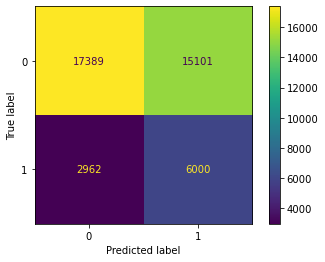

In [62]:
# Check the classification report and the confusion matrix

print(classification_report(y_true = y_test, y_pred = pred))

cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [63]:
# Let us look at label mappings to check what 0 and 1 mean
# Looks like "0" means NoDispute, and "1" means "Dispute"

print("Label mapping is:", labels)

Label mapping is: {0: 'No', 1: 'Yes'}


Calculating total cost in dollars

In [64]:
# Cost when model predicts dispute and actually disputed
True_NoDispute_Cost = 100 * cm[0, 0]

# Cost when model predicts dispute and no actual dispute 
False_Dispute_Cost = 190 * cm[0,1]

# Cost when model predicts NoDispute and actually disputed
False_NoDispute_Cost = 600 * cm[1,0]

# Cost when model predicts NoDispute correctly
True_Dispute_Cost = 190 * cm[1,1]

In [65]:
Total_cost = True_NoDispute_Cost + False_Dispute_Cost + False_NoDispute_Cost + True_Dispute_Cost
Total_cost

7525290

**adjust to optimize costs

100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.65it/s]


CPU times: user 1min 38s, sys: 1.21 s, total: 1min 39s
Wall time: 13.2 s


<AxesSubplot:xlabel='threshold', ylabel='Total_cost'>

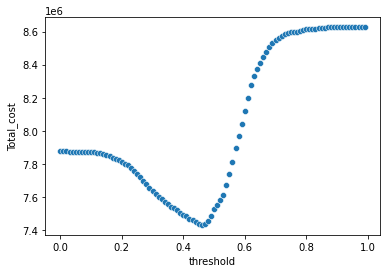

In [66]:
%%time
# Set threshold for identifying class 1
threshold = 0.0001
appended_data = []

for threshold in tqdm(np.arange(0,1,.01)):
    # Create predictions.  Note that predictions give us probabilities, not classes!
    pred_prob = model_xgb.predict_proba(X_test)

    # We drop the probabilities for class 0, and keep just the second column
    pred_prob = pred_prob[:,1]

    # Convert probabilities to 1s and 0s based on threshold
    pred = (pred_prob>threshold).astype(int)

    # confusion matrix
    cm = confusion_matrix(y_test, pred)
    
    # accuracy score of the model
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred,zero_division=0)
    recall = recall_score(y_test, pred)
    
    # Cost when model predicts dispute and actually disputed
    True_NoDispute_Cost = 100 * cm[0, 0]

    # Cost when model predicts dispute and no actual dispute 
    False_Dispute_Cost = 190 * cm[0,1]

    # Cost when model predicts NoDispute and actually disputed
    False_NoDispute_Cost = 600 * cm[1,0]

    # Cost when model predicts NoDispute correctly
    True_Dispute_Cost = 190 * cm[1,1]
    
    Total_cost = True_NoDispute_Cost + False_Dispute_Cost + False_NoDispute_Cost + True_Dispute_Cost
    Total_cost
    
    data = pd.DataFrame({'threshold':[threshold], 'accuracy': [accuracy], 
                         'precision':[precision], 'recall':[recall],
                         'True_NoDispute_Cost':[True_NoDispute_Cost], 
                         'False_Dispute_Cost':[False_Dispute_Cost], 
                         'False_NoDispute_Cost':[False_NoDispute_Cost],
                         'True_Dispute_Cost':[True_Dispute_Cost],
                         'Total_cost':[Total_cost]})
    appended_data.append(data)
    
    

appended_data = pd.concat(appended_data)    

appended_data.reset_index()
# appended_data.to_excel('temp.xlsx')
sns.scatterplot(data = appended_data, y = 'Total_cost', x = 'threshold')

In [67]:
print(round(appended_data[appended_data.Total_cost == appended_data.Total_cost.min()].transpose(),3))

                                0
threshold                   0.460
accuracy                    0.473
precision                   0.267
recall                      0.821
True_NoDispute_Cost   1225600.000
False_Dispute_Cost    3844460.000
False_NoDispute_Cost   961800.000
True_Dispute_Cost     1398210.000
Total_cost            7430070.000


the minimal cost is 7.43m and the threshold is 0.46

**AUC and ROC calculation

In [68]:
#AUC calculation
from sklearn import metrics
metrics.roc_auc_score(y_test, pred_prob)

0.6452185208790661

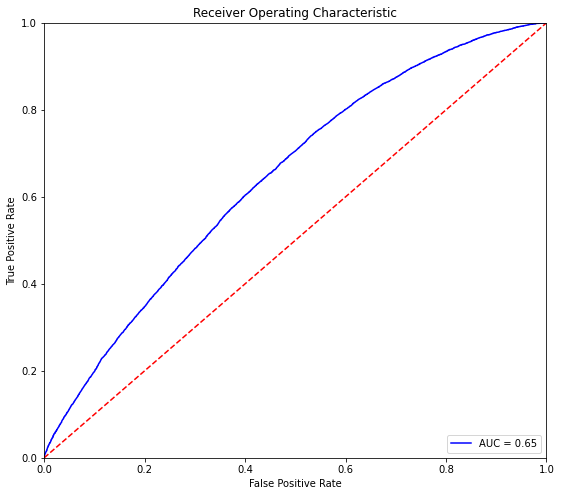

In [69]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [70]:
pd.DataFrame({'TPR': tpr, 'FPR': fpr, 'Threshold': thresholds}).sort_values(by = ['Threshold']).reset_index(drop=True)

,TPR,FPR,Threshold
0,1.000000,1.000000,0.010017
1,1.000000,0.999938,0.010471
2,1.000000,0.999877,0.011018
3,1.000000,0.999631,0.019526
4,1.000000,0.999446,0.020056
...,...,...,...
13361,0.000446,0.000062,0.872317
13362,0.000446,0.000031,0.877841
13363,0.000112,0.000031,0.888328
13364,0.000112,0.000000,0.893450


In [71]:
# Save to Excel, just easier to see there.  No need to do this if you don't want to.
pd.DataFrame({'TPR': tpr, 'FPR': fpr, 'Threshold': thresholds}).sort_values(by = ['Threshold']).reset_index(drop=True).to_excel('temp.xlsx')

try other models

neural network

logistic regression

svm